# Аттрактор Лоренца

##  Задача №1. Простое решение

<br>
<font size=4> 
Система
</font>
<br>
<br>
$
\Large
\begin{cases}
   \dot{x} = \sigma (y - x), 
   \\
   \dot{y} = x (\rho - z) - y,
   \\
   \dot{z} = x y - \beta z
 \end{cases}\normalsize
 $
<br>
<font size=4> 
Стандартные значения - $\sigma=10, \rho=28, \beta=2.667$
</font>
<br>

__Требования__:
- Не использовать интеграторы и массивы numpy, точки высчитывать в цикле
- Начальные данные - $(0., 1., 1.01)$
- Количество точек - $10^4$
- Подписать рисунок и оси
- label со значениями $\sigma=10, \rho=28, \beta=2.667$


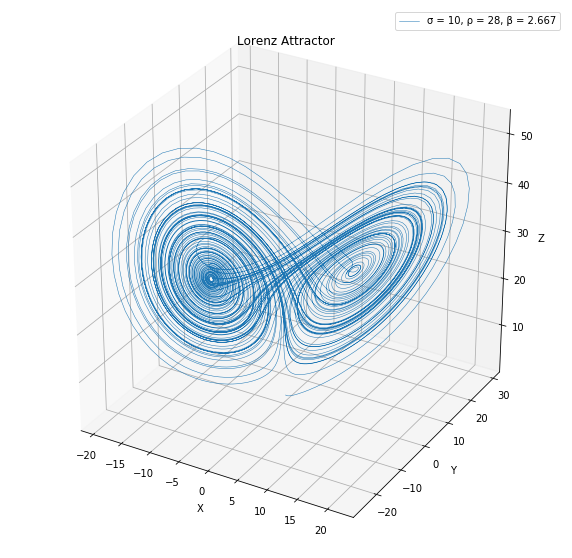

In [18]:
import matplotlib.pyplot as pyplot
from mpl_toolkits.mplot3d import Axes3D

def lorenz(x, y, z, sigma = 10, rho = 28, beta = 2.667):
    x_derev = sigma * (y - x)
    y_derev = x * (pho - z) - y
    z_derev = x * y - beta * z
    return x_derev, y_derev, z_derev

num_steps = pow(10, 4)
dt = 0.01
x = [0.]
y = [1.]
z = [1.01]

for i in range(num_steps):
    x_der, y_der, z_der = lorenz(x[i], y[i], z[i])
    x.append(x[i] + x_der * dt)
    y.append(y[i] + y_der * dt)
    z.append(z[i] + z_der * dt)
    
plot = pyplot.figure(figsize = (10, 10))
ax = plot.gca(projection = '3d')

ax.plot(x, y, z, lw = 0.5)
ax.set_title("Lorenz attractor")
ax.legend(['\u03C3 = 10, \u03C1 = 28, \u03B2 = 2.667'])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

pyplot.show();

##  Задача №2. Чуть сложнее

Аттрактор Лоренца, но другие требования:

- Использовать numpy массивы, не использовать интегрирование из scipy
- Начальные данные - $(0., 1., 1.01)$
- Количество точек - $10^4$
- Для вычисления очередной точки использовать специальную функцию `lorenz(...)`, причем
    - `lorenz(x, y, z)` считает производные при стандартных значениях $\sigma=10, \rho=28, \beta=2.667$
    - если нужны другие значения $\sigma, \rho, \beta$, то вызывать можно только как `lorenz(x, y, z, sigma=..., beta=..., rho=...)`
- Подписать рисунок и оси
- label со значениями $\sigma, \rho, \beta$, для которых построена фигура

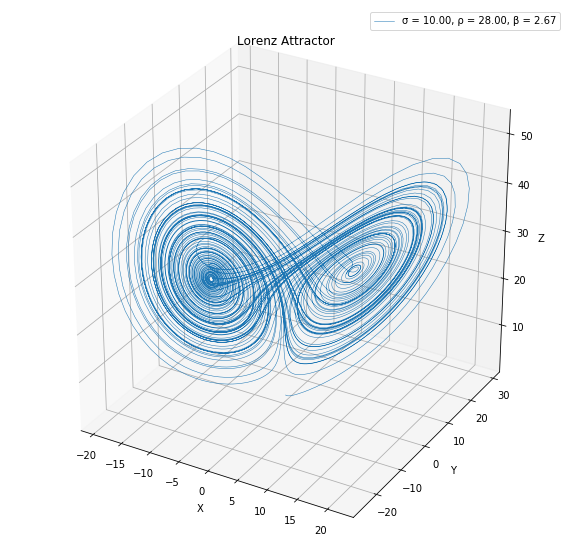

In [31]:
import numpy as np

def array_lorenz(x, y, z, sigma = 10, rho = 28, beta = 2.667):
    x_derev = sigma * (y - x)
    y_derev = x * (rho - z) - y
    z_derev = x * y - beta * z
    return np.array([[x_derev, y_derev, z_derev]])

num_steps = pow(10, 4)
dt = 0.01

sigma = 10
rho = 28
beta = 2.667

A = np.zeros([num_steps + 1, 3])
A[0,:] = [0., 1., 1.01]

for i in range(num_steps):
    arr_to_add = array_lorenz(A[i,0], A[i,1], A[i,2], sigma = sigma, rho = rho, beta = beta)
    A[i+1,:] = A[i,:] + arr_to_add*dt
    
fig = pyplot.figure(figsize = (10, 10))
ax = fig.gca(projection = '3d')

ax.plot(A[:,0], A[:,1], A[:,2], lw = 0.5)
ax.set_title("Lorenz attractor")
ax.legend(['\u03C3 = %4.2f, \u03C1 = %4.2f, \u03B2 = %4.2f' %(sigma, rho, beta)])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

pyplot.show();


##  Задача №3. Сложнее, но короче

Аттрактор Лоренца, но требования опять поменялись:

- Использовать numpy массивы и интегрирование из scipy (odeint)
- Начальные данные - $(0., 1., 1.01)$
- Временной интервал - $0...100$
- Количество точек - $10^4$
- Для вычисления очередной точки использовать специальную функцию `lorenz(...)`, причем первый аргумент - кортеж из трех точек; остальное - как в _задаче №2_ (может что-то ещё понадобится, посмотрите сигнатуру `odeint`)
- Подписать рисунок и оси
- label со значениями $\sigma, \rho, \beta$, для которых построена фигура

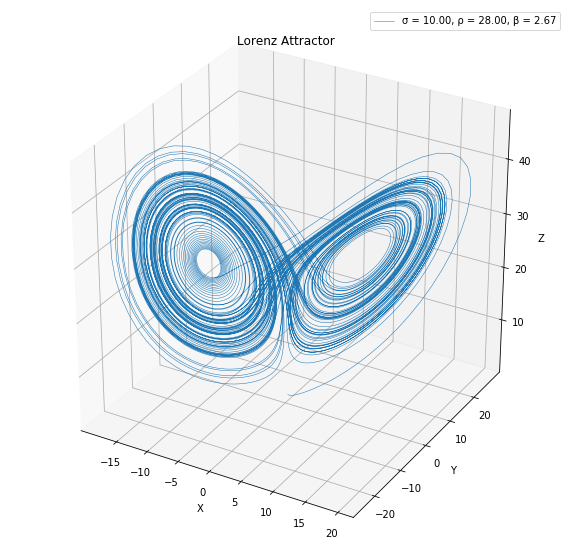

In [38]:
import numpy as np
from scipy.integrate import odeint

def lorenz_odient(X, t, sigma, beta, rho):
    x_derev = sigma * (X[1] - X[0])
    y_derev = X[0] * (rho - X[2]) - X[1]
    z_derev = X[0] * X[1] - beta * X[2]
    return x_der, y_der, z_der

tmax, num_steps = 100, 10 ** 4

sigma, rho, beta = 10, 28, 2.667
x0, y0, z0 = 0., 1., 1.01

t = np.linspace(0, tmax, num_steps)
f = odeint(lorenz_odient, (x0, y0, z0), t, args = (sigma, beta, rho))
x, y, z = f.T

fig = pyplot.figure(figsize = (10, 10))
ax = fig.gca(projection='3d')

ax.plot(x, y, z, lw = 0.5)
ax.set_title("Lorenz attractor")
ax.legend(['\u03C3 = %4.2f, \u03C1 = %4.2f, \u03B2 = %4.2f' %(sigma, rho, beta)])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

pyplot.show();